In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy as sp
import matplotlib.mlab as mlab
from pathlib import Path

In [2]:
variable = '[Tubulin]'
date = ['2019-06-10','2019-06-12','2019-06-13','2019-07-03','2019-07-04','2019-07-04_1']
jointdate = '_'.join(date)
micscp = 'DIC' #TIRF or DIC
paths = []

for i in date :
    p = 'E:\\Sofia\\2019_summer_dynamics_control\\'+i+'_'+micscp
    path = Path(p)
    paths = paths+[path]
    print(path.exists())

paths

True
True
True
True
True
True


[WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-06-10_DIC'),
 WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-06-12_DIC'),
 WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-06-13_DIC'),
 WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-07-03_DIC'),
 WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-07-04_DIC'),
 WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-07-04_1_DIC')]

In [3]:
data = pd.read_csv(paths[0]/(date[0]+'_data.csv'),sep=',',index_col=0);
for i in np.arange(1,len(date)):
    df = pd.read_csv(paths[i]/(date[i]+'_data.csv'),sep=',',index_col=0);
    data = data.append(df)
data = data.sort_values(by=['tub conc'])
data.to_csv(path.parents[0]/('joint_means_'+jointdate+'.csv'), encoding='utf-8', index=True)
data

,tub conc,growth mean,growth std,time2nuc mean,time2nuc std,lifetime mean,lifetime std
24,6.0,0.256480,0.081636,16.268295,14.216301,2.490516,1.925962
24,7.0,0.345033,0.073437,13.883387,11.495026,2.935016,1.901343
23,7.0,0.433777,0.060937,11.836431,10.775015,4.850945,3.742086
31,7.0,0.477922,0.067152,14.899665,12.801551,4.642286,3.498365
23,8.0,0.396401,0.078463,9.271644,9.428037,3.371842,2.185876
21,8.0,0.497367,0.084237,9.510313,11.385602,5.446350,3.914288
21,10.0,0.669962,0.106993,7.623301,9.148209,6.366696,4.680739
14,10.0,0.676236,0.110819,8.493002,9.161350,7.208601,5.720200
11,10.0,0.669461,0.113805,8.444653,9.305885,6.828039,5.787460
22,12.0,0.736231,0.120764,4.756311,5.860955,7.095569,5.855912


In [4]:
a = np.unique(data['tub conc'].values)
tub_concs = np.char.mod('%d', a)
tub_concs = tub_concs.astype(float)
name = ['growth','time2nuc','lifetime']
tub_concs

array([ 6.,  7.,  8., 10., 12., 14., 15.])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib

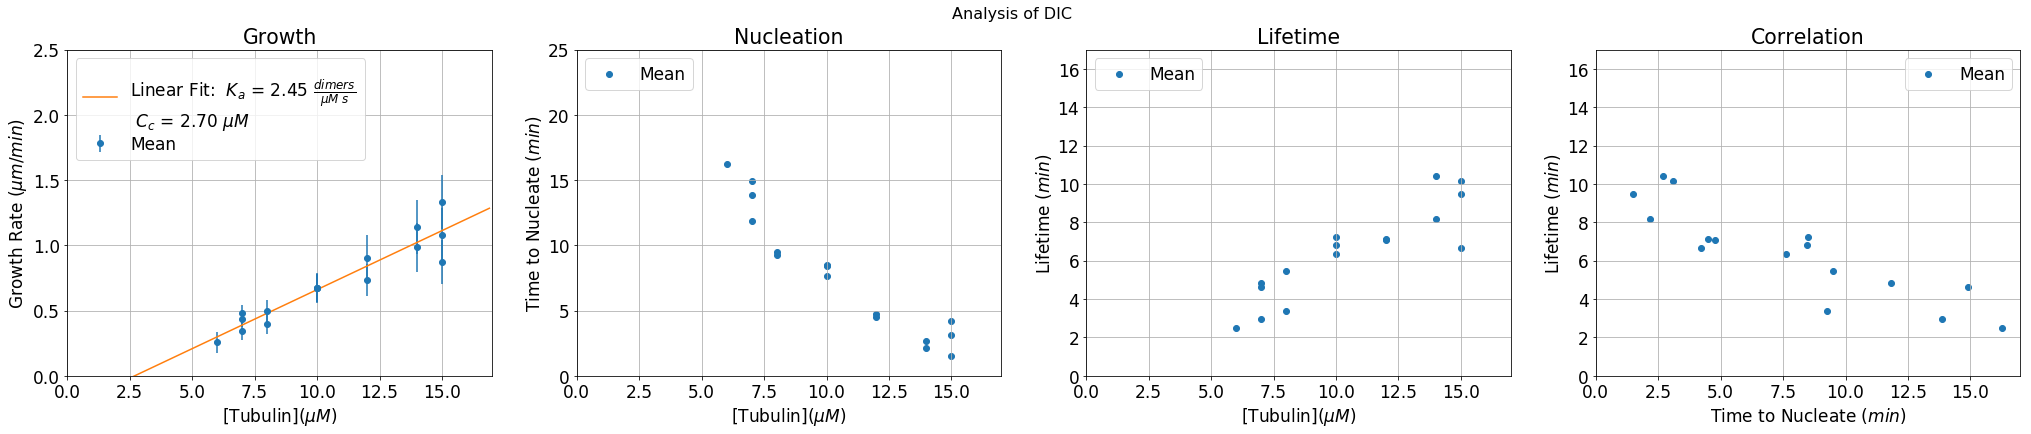

In [5]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 17}
plt.rc('font', **font)

titles = ('Growth','Nucleation','Lifetime','Correlation')
ylables = ('Growth Rate ' r'$(\mu m / min)$','Time to Nucleate ' r'$(min)$','Lifetime ' r'$(min)$','Lifetime ' r'$(min)$')

a1 , a0 = np.polyfit(data['tub conc'], data['growth mean'], 1)
y_int = -a0/a1
x_range = np.arange(0,17,0.1)

plt.figure(figsize=(35,6))
plt.suptitle('Analysis of '+micscp, fontsize=16)
 
plt.subplot(1,4,1)
plt.errorbar(data['tub conc'], data['growth mean'], yerr=data['growth std'], fmt='o')
plt.plot(x_range, a1*x_range+a0)
plt.ylim(0,2.5)
plt.legend(('Linear Fit:  'r'$K_a$'' = %.2f 'r'$\frac{dimers}{\mu M \; s}$'' \n 'r'$C_c$'' = %.2f 'r'$\mu M$' %(a1*27.1, y_int),'Mean'),loc='upper left')

plt.subplot(1,4,2)
plt.scatter(data['tub conc'], data['time2nuc mean'])
#plt.scatter(data['tub conc'], data['time2nuc std'])
plt.ylim(0,25)
plt.legend(( 'Mean',r'$\sigma$'),loc='upper left')

plt.subplot(1,4,3)
plt.scatter(data['tub conc'], data['lifetime mean'])
#plt.scatter(data['tub conc'], data['lifetime std'])
plt.ylim(0,17)
plt.legend(('Mean', r'$\sigma$'),loc='upper left')

plt.subplot(1,4,4)
plt.scatter(data['time2nuc mean'], data['lifetime mean'])
plt.ylim(0,17)
plt.legend(('Mean', r'$\sigma$'),loc='upper right')


for i in [0,1,2,3] :
    plt.subplot(1,4,i+1)
    plt.xlabel(variable + r'$(\mu M)$')
    plt.ylabel(ylables[i])
    plt.title(titles[i]);
    plt.xlim(0,17)
    plt.grid(True)
plt.xlabel('Time to Nucleate ' r'$(min)$')
plt.xlim(0,17)
plt.savefig(path.parents[0]/('joint_graphs_'+jointdate+'.pdf'))
plt.savefig(path.parents[0]/('joint_graphs_'+jointdate+'.png'))

In [6]:
def save_jointraw(date,name):
    
    df = pd.DataFrame([],columns=[])

    for i in np.arange(len(date)):
        df2 = pd.read_csv(paths[i]/(date[i]+'_'+name+'.csv'),sep=',');
        df2.columns = df2.columns.astype(float);
        df= pd.concat([df,df2],sort=False)

    df = df.reindex(sorted(df.columns), axis=1)

    df.to_csv(path.parents[0]/('joint_'+name+'_'+jointdate+'.csv'), encoding='utf-8', index=False)

In [7]:
for j in np.arange(len(name)):
    save_jointraw(date,name[j])

# Fitting Data #

In [8]:
def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) )/(sig*np.sqrt(2*np.pi))

def exponential(x, scale):
    return ((np.exp(-x/scale) )/(scale))

def gamma(x, shape, scale):
    return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))

dataG = pd.read_csv(path.parents[0]/('joint_'+name[0]+'_'+jointdate+'.csv'),sep=',');
dataN = pd.read_csv(path.parents[0]/('joint_'+name[1]+'_'+jointdate+'.csv'),sep=',');
dataC = pd.read_csv(path.parents[0]/('joint_'+name[2]+'_'+jointdate+'.csv'),sep=',');

In [9]:
def gaussian_fit(data):
    r = {variable:np.empty(0),'mu':np.empty(0) ,'sigma':np.empty(0)}
    results = pd.DataFrame(data=r)
    
    for i in list(data):
        y = data[i].dropna().values
        
        n, bins, patches = plt.hist(y, bins=np.arange(0, 3 + 0.05, 0.05), density=True);
        plt.clf()

        coeff, var_matrix = sp.optimize.curve_fit(gaussian,bins[:-1],n)
        
        variance = np.diagonal(var_matrix) #Refer [3]
        SE = np.sqrt(variance) #Refer [4]

#======Making a data frame========
        r = {variable:[float(i),float(i)],'mu':[coeff[0],SE[0]],'sigma':[coeff[1],SE[1]]}
        results0 = pd.DataFrame(data=r, index=(['Value','SE']))
        results = pd.concat([results, results0], sort=False)
    
    return results

def exponential_fit(data):
    r = {'scale e':np.empty(0)}
    results = pd.DataFrame(data=r)
    
    for i in list(data):
        y = data[i].dropna().values
        
        n, bins, patches = plt.hist(y, bins=np.arange(0, 60 + 0.5, 0.5), density=True);
        plt.clf()

        coeff, var_matrix = sp.optimize.curve_fit(exponential,bins[:-1],n)
        
        variance = np.diagonal(var_matrix) #Refer [3]
        SE = np.sqrt(variance) #Refer [4]

#======Making a data frame========
        r = {'scale e':[coeff[0],SE[0]]}
        results0 = pd.DataFrame(data=r, index=(['Value','SE']))
        results = pd.concat([results, results0], sort=False)
    
    return results

def gamma_fit(data):
    r = {'shape':np.empty(0) ,'scale g':np.empty(0)}
    results = pd.DataFrame(data=r)
    
    for i in list(data):
        y = data[i].dropna().values
        
        n, bins, patches = plt.hist(y, bins=np.arange(0, 60 + 0.5, 0.5), density=True);
        plt.clf()

        coeff, var_matrix = sp.optimize.curve_fit(gamma,bins[:-1],n,[1.1,1])
        
        variance = np.diagonal(var_matrix) #Refer [3]
        SE = np.sqrt(variance) #Refer [4]

#======Making a data frame========
        r = {'shape':[coeff[0],SE[0]],'scale g':[coeff[1],SE[1]]}
        results0 = pd.DataFrame(data=r, index=(['Value','SE']))
        results = pd.concat([results, results0], sort=False)
    
    return results

In [10]:
fitdata = pd.concat([gaussian_fit(dataG), exponential_fit(dataN),gamma_fit(dataC)], axis=1, sort=False)
fitdata.to_csv(path.parents[0]/('joint_fitdata_'+jointdate+'.csv'), encoding='utf-8', index=True)
fitdata

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


,[Tubulin],mu,sigma,scale e,shape,scale g
Value,6.0,0.227259,0.071685,18.337077,2.730937,0.660405
SE,6.0,0.005694,0.004649,2.404383,0.108279,0.031369
Value,7.0,0.399025,0.084541,14.669497,2.095348,1.566573
SE,7.0,0.001910,0.001560,0.871132,0.083181,0.079358
Value,8.0,0.414874,0.094281,8.325730,1.852157,2.106082
SE,8.0,0.002509,0.002049,0.384930,0.069941,0.104777
Value,10.0,0.658315,0.106446,6.508629,1.353426,4.730791
SE,10.0,0.002203,0.001799,0.320732,0.057471,0.293038
Value,12.0,0.781291,0.162291,3.641660,1.350240,4.963415
SE,12.0,0.003924,0.003204,0.193811,0.073064,0.393758


<Figure size 432x288 with 0 Axes>

#  PLOT DATA  #

In [38]:
name = ['growth','time2nuc','lifetime']

fitdata = pd.read_csv(path.parents[0]/('joint_fitdata_'+jointdate+'.csv'), encoding='utf-8',index_col=0)
dataG = pd.read_csv(path.parents[0]/('joint_'+name[0]+'_'+jointdate+'.csv'),sep=',');
dataN = pd.read_csv(path.parents[0]/('joint_'+name[1]+'_'+jointdate+'.csv'),sep=',');
dataC = pd.read_csv(path.parents[0]/('joint_'+name[2]+'_'+jointdate+'.csv'),sep=',');

font = {'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)
#plt.rcParams['font.family'] ='Helvetica Neue Lt Std'

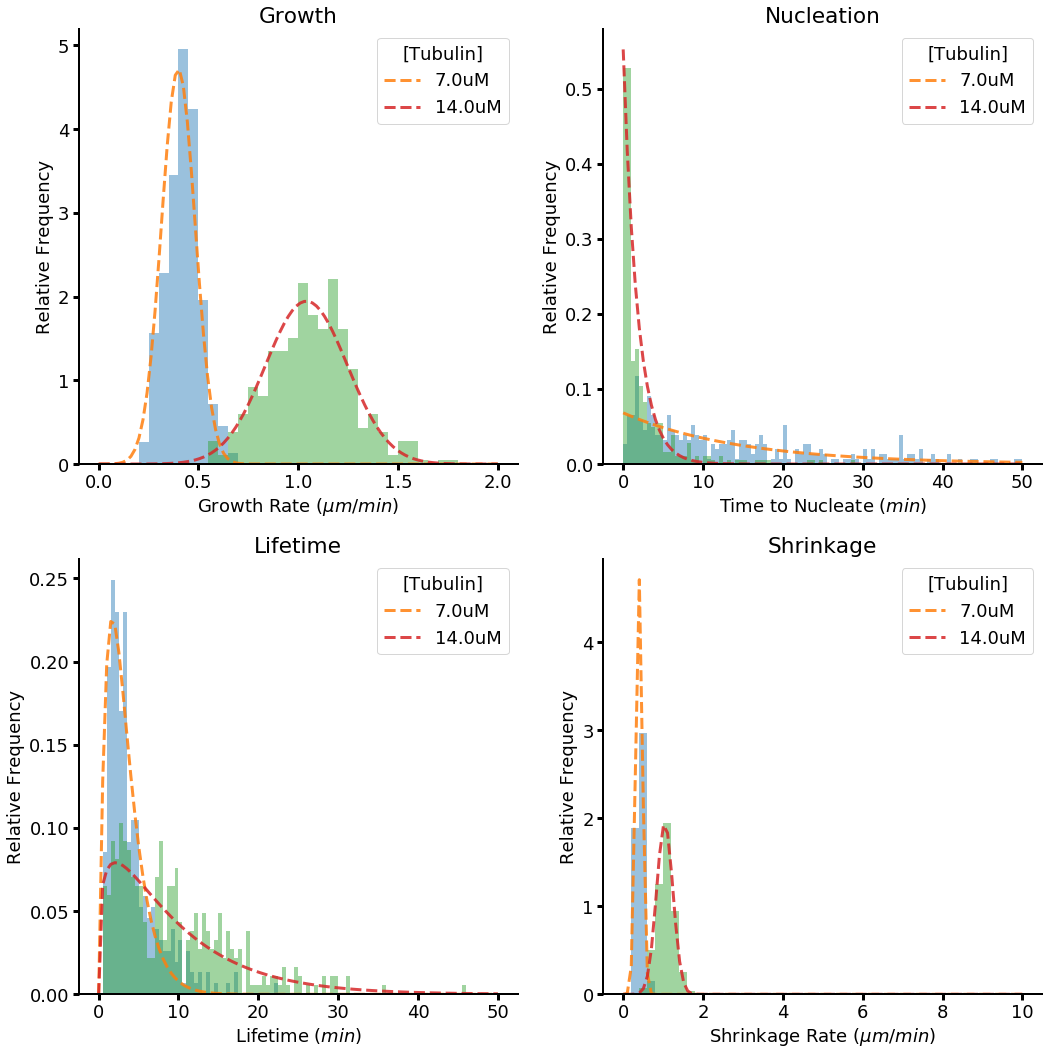

In [44]:
legnd0 = []
legnd1 = []
legnd2 = []
legnd3 = []

titles = ('Growth','Nucleation','Lifetime','Shrinkage')
xlables = ('Growth Rate ' r'$(\mu m / min)$','Time to Nucleate ' r'$(min)$','Lifetime ' r'$(min)$','Shrinkage Rate ' r'$(\mu m / min)$')

fig, axs = plt.subplots(2,2,figsize=(15,15))
#fig.suptitle('Pooled data', fontsize=18)

for i in ['7.0','14.0']:#tub_concs:#['6']:#list(data):
    
    datos = dataG[i].dropna()
    mu0 = fitdata.loc[fitdata[variable] == float(i)]['mu']['Value']
    sigma0 = fitdata.loc[fitdata[variable] == float(i)]['sigma']['Value']
    n, bins, patches = axs[0][0].hist(datos, bins=np.arange(0, 2 + 0.05, 0.05), density=True, alpha=0.45);
    x = np.linspace(0, bins[-1], 100)
    axs[0][0].plot(x, sp.stats.norm.pdf(x,mu0,sigma0),'--', lw=3, alpha=0.85)
    legnd0 = legnd0 + [i+'uM']#, '+r'$\mu =$'+ str(round(mu0,3))+r', $\sigma =$'+ str(round(sigma0,3))]
    
    datos = dataN[i].dropna()
    scale0 = fitdata.loc[fitdata[variable] == float(i)]['scale e']['Value']
    n, bins, patches = axs[0][1].hist(datos, bins=np.arange(0, 50 + 0.5, 0.5), density=True, alpha=0.45);
    x = np.linspace(0, bins[-1], 100)
    axs[0][1].plot(x, sp.stats.expon.pdf(x,0,scale0),'--', lw=3, alpha=0.85)
    legnd1 = legnd1 + [i+'uM']
    
    datos = dataC[i].dropna()
    shape0 = fitdata.loc[fitdata[variable] == float(i)]['shape']['Value']
    scale0 = fitdata.loc[fitdata[variable] == float(i)]['scale g']['Value']
    n, bins, patches = axs[1][0].hist(datos, bins=np.arange(0, 50 + 0.5, 0.5), density=True, alpha=0.45);
    x = np.linspace(0, bins[-1], 100)
    axs[1][0].plot(x, sp.stats.gamma.pdf(x, shape0, 0 , scale0),'--', lw=3, alpha=0.85)
    legnd2 = legnd2 + [i+'uM']
    
    datos = dataG[i].dropna()
    mu0 = fitdata.loc[fitdata[variable] == float(i)]['mu']['Value']
    sigma0 = fitdata.loc[fitdata[variable] == float(i)]['sigma']['Value']
    n, bins, patches = axs[1][1].hist(datos, bins=np.arange(0, 10 + 0.2, 0.2), density=True, alpha=0.45);
    x = np.linspace(0, bins[-1], 100)
    axs[1][1].plot(x, sp.stats.norm.pdf(x,mu0,sigma0),'--', lw=3, alpha=0.85)
    legnd3 = legnd3 + [i+'uM']#, '+r'$\mu =$'+ str(round(mu0,3))+r', $\sigma =$'+ str(round(sigma0,3))]

count = 0 
for i in np.arange(len(axs)):
    for j in np.arange(len(axs)):
        axs[i][j].set_ylabel('Relative Frequency')
        axs[i][j].set_xlabel(xlables[count])
        axs[i][j].set_title(titles[count]);
        axs[i][j].spines['right'].set_visible(False)
        axs[i][j].spines['top'].set_visible(False)
        axs[i][j].spines['left'].set_lw(2)
        axs[i][j].spines['bottom'].set_lw(2)
        axs[i][j].tick_params(axis='both', width = 3, length = 6)
        count += 1

axs[0][0].legend(legnd0,loc='upper right',title=variable)
axs[1][0].legend(legnd1,loc='upper right',title=variable)
axs[0][1].legend(legnd2,loc='upper right',title=variable)
axs[1][1].legend(legnd3,loc='upper right',title=variable)
#plt.savefig(path.parents[0]/('joint_histogramsfit_'+jointdate+'.png'))
plt.savefig(path.parents[0]/('POSTERjoint_histogramsfit_'+jointdate+'.pdf'))
plt.tight_layout()
plt.show()

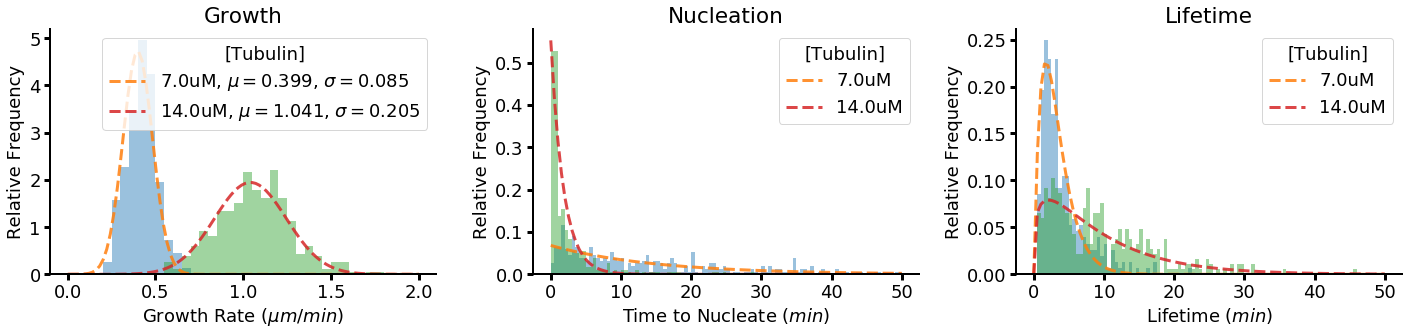

In [36]:
legnd0 = []
legnd1 = []
legnd2 = []

titles = ('Growth','Nucleation','Lifetime','Correlation')
xlables = ('Growth Rate ' r'$(\mu m / min)$','Time to Nucleate ' r'$(min)$','Lifetime ' r'$(min)$','Time to Nucleate ' r'$(min)$')

fig, axs = plt.subplots(1,3,figsize=(20,5))
#fig.suptitle('Pooled data', fontsize=18)

for i in ['7.0','14.0']:#tub_concs:#['6']:#list(data):
    
    datos = dataG[i].dropna()
    mu0 = fitdata.loc[fitdata[variable] == float(i)]['mu']['Value']
    sigma0 = fitdata.loc[fitdata[variable] == float(i)]['sigma']['Value']
    n, bins, patches = axs[0].hist(datos, bins=np.arange(0, 2 + 0.05, 0.05), density=True, alpha=0.45);
    x = np.linspace(0, bins[-1], 100)
    axs[0].plot(x, sp.stats.norm.pdf(x,mu0,sigma0),'--', lw=3, alpha=0.85)
    legnd0 = legnd0 + [i+'uM, '+r'$\mu =$'+ str(round(mu0,3))+r', $\sigma =$'+ str(round(sigma0,3))]
    
    datos = dataN[i].dropna()
    scale0 = fitdata.loc[fitdata[variable] == float(i)]['scale e']['Value']
    n, bins, patches = axs[1].hist(datos, bins=np.arange(0, 50 + 0.5, 0.5), density=True, alpha=0.45);
    x = np.linspace(0, bins[-1], 100)
    axs[1].plot(x, sp.stats.expon.pdf(x,0,scale0),'--', lw=3, alpha=0.85)
    legnd1 = legnd1 + [i+'uM']
    
    datos = dataC[i].dropna()
    shape0 = fitdata.loc[fitdata[variable] == float(i)]['shape']['Value']
    scale0 = fitdata.loc[fitdata[variable] == float(i)]['scale g']['Value']
    n, bins, patches = axs[2].hist(datos, bins=np.arange(0, 50 + 0.5, 0.5), density=True, alpha=0.45);
    x = np.linspace(0, bins[-1], 100)
    axs[2].plot(x, sp.stats.gamma.pdf(x, shape0, 0 , scale0),'--', lw=3, alpha=0.85)
    legnd2 = legnd2 + [i+'uM']

for j in np.arange(len(axs)):
    axs[j].set_ylabel('Relative Frequency')
    axs[j].set_xlabel(xlables[j])
    axs[j].set_title(titles[j]);
    axs[j].spines['right'].set_visible(False)
    axs[j].spines['top'].set_visible(False)
    axs[j].spines['left'].set_lw(2)
    axs[j].spines['bottom'].set_lw(2)
    axs[j].tick_params(axis='both', width = 3, length = 6)

axs[0].legend(legnd0,loc='upper right',title=variable)
axs[1].legend(legnd1,loc='upper right',title=variable)
axs[2].legend(legnd2,loc='upper right',title=variable)
#plt.savefig(path.parents[0]/('joint_histogramsfit_'+jointdate+'.png'))
plt.savefig(path.parents[0]/('POSTERjoint_histogramsfit_'+jointdate+'.pdf'))
plt.tight_layout()
plt.show()

In [26]:
conc = fitdata[variable]['Value'].values
gamma_mu = np.multiply(fitdata['scale g']['Value'].values,fitdata['shape']['Value'].values)
gamma_muSE = np.add(np.multiply(fitdata['scale g']['Value'].values,fitdata['shape']['SE'].values),np.multiply(fitdata['scale g']['SE'].values,fitdata['shape']['Value'].values))

def linear_fit(x, a0, a1):
    return a0 + x*a1

coeffG, var_matrixG = sp.optimize.curve_fit(linear_fit,conc, fitdata['mu']['Value'].values)
varianceG = np.diagonal(var_matrixG) #Refer [3]
SEG = np.sqrt(varianceG) #Refer [4]

a0 = coeffG[0]
a1 = coeffG[1]
y_int = -a0/a1
y_int_SE = y_int*(abs(SEG[0]/a0)+abs(SEG[1]/a1))


coeffL, var_matrixL = sp.optimize.curve_fit(linear_fit,conc, gamma_mu)
varianceL = np.diagonal(var_matrixL) #Refer [3]
SEL = np.sqrt(varianceL) #Refer [4]

A0 = coeffL[0]
A1 = coeffL[1]
Y_int = -A0/A1
Y_int_SE = Y_int*(abs(SEL[0]/A0)+abs(SEL[1]/A1))

def exponential_nonorm(x, y0, a, k):
    return ((np.exp(-(x)*k) )*a+y0)

coeff, var_matrix = sp.optimize.curve_fit(exponential_nonorm,conc, fitdata['scale e']['Value'].values)
        
variance = np.diagonal(var_matrix) #Refer [3]
SE = np.sqrt(variance) #Refer [4]

coeffC, var_matrixC = sp.optimize.curve_fit(exponential_nonorm,gamma_mu,fitdata['scale e']['Value'].values)
        
varianceC = np.diagonal(var_matrix) #Refer [3]
SEC = np.sqrt(variance) #Refer [4]

x_range = np.arange(0,17,0.1)

In [27]:
gamma_muSE
blue = '#23459C'
orange = '#FF7300'
green = '#79BA1A'

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib

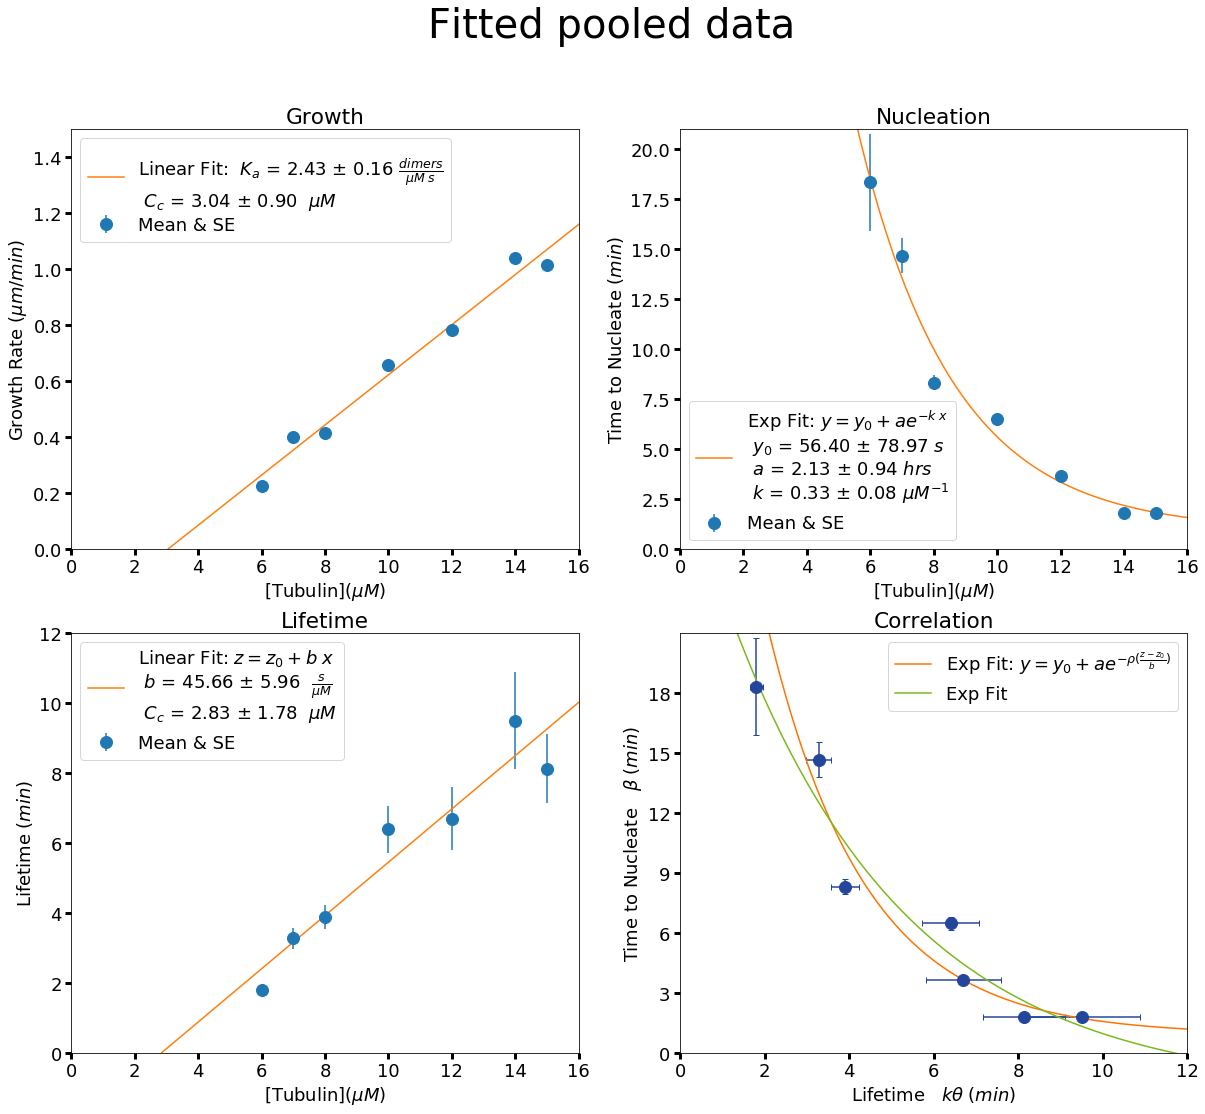

In [28]:
titles = ('Growth','Nucleation','Lifetime','Correlation')
ylables = ('Growth Rate ' r'$(\mu m / min)$','Time to Nucleate ' r'$(min)$','Lifetime ' r'$(min)$','Time to Nucleate   ' r'$\beta \; (min)$')

ylim = 21
scattersize = 12

plt.figure(figsize=(20,17))
plt.suptitle('Fitted pooled data', fontsize=40)

plt.subplot(2,2,1)
plt.errorbar(conc, fitdata['mu']['Value'].values, yerr=fitdata['mu']['SE'].values, fmt='o', markersize=scattersize)
plt.plot(x_range, a1*x_range+a0)
plt.ylim(0,1.5)
plt.legend(('Linear Fit:  'r'$K_a$'' = %.2f 'r'$\pm$'' %.2f 'r'$\frac{dimers}{\mu M \; s}$''\n 'r'$C_c$'' = %.2f 'r'$\pm$'' %.2f  'r'$\mu M$' %(a1*27.1,SEG[1]*27.1, y_int,y_int_SE),'Mean & SE'),loc='upper left')

plt.subplot(2,2,2)
plt.errorbar(conc, fitdata['scale e']['Value'].values, yerr=fitdata['scale e']['SE'].values, fmt='o', markersize=scattersize)
plt.plot(x_range, exponential_nonorm(x_range, coeff[0],coeff[1],coeff[2]))
plt.ylim(0,ylim)
plt.legend(('Exp Fit: 'r'$y = y_0+a e^{-k \; x}$' '\n 'r'$y_0$'' = %.2f 'r'$\pm$'' %.2f 'r'$s$''\n 'r'$a$'' = %.2f 'r'$\pm$'' %.2f 'r'$hrs$''\n 'r'$k$'' = %.2f 'r'$\pm$'' %.2f 'r'$\mu M ^{-1}$' %(coeff[0]*60,SE[0]*60,coeff[1]/60,SE[1]/60,coeff[2],SE[2]),'Mean & SE'),loc='lower left')

plt.subplot(2,2,3)
plt.errorbar(conc, gamma_mu, yerr=gamma_muSE, fmt='o', markersize=scattersize)
plt.plot(x_range, A1*x_range+A0)
plt.ylim(0,12)
plt.legend(('Linear Fit: 'r'$z = z_0 + b \; x$' '\n 'r'$b$'' = %.2f 'r'$\pm$'' %.2f  'r'$\frac{s}{\mu M}$''\n 'r'$C_c$'' = %.2f 'r'$\pm$'' %.2f  'r'$\mu M$' %(A1*60,SEL[1]*60, Y_int,Y_int_SE),'Mean & SE'),loc='upper left')

plt.subplot(2,2,4)
plt.errorbar( gamma_mu,fitdata['scale e']['Value'].values, xerr=gamma_muSE , yerr=fitdata['scale e']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color = blue)
plt.plot(x_range, exponential_nonorm((x_range-A0)/A1, coeff[0],coeff[1],coeff[2]),color=orange)
plt.plot(x_range, exponential_nonorm(x_range, coeffC[0],coeffC[1],coeffC[2]),color=green)
plt.ylim(0,21)
plt.xticks(np.arange(0, 16, 2))
plt.yticks(np.arange(0, 21, 3))
plt.legend(('Exp Fit: 'r'$y = y_0+a e^{- \rho (\frac{z-z_0}{b})}$','Exp Fit'),loc='upper right')


for i in [0,1,2,3] :
    plt.subplot(2,2,i+1)
    plt.xlabel(variable + r'$(\mu M)$')
    plt.ylabel(ylables[i])
    plt.title(titles[i]);
    plt.xlim(0,16)
    plt.axis(option =  'off')
#     plt.spines['top'].set_visible(False)
#     plt.spines['left'].set_lw(1.5)
#     plt.spines['bottom'].set_lw(1.5)
    plt.tick_params(axis='both', width = 3, length = 6)
    #plt.grid(True)

plt.xlabel('Lifetime   ' r'$k \theta \; (min)$') 
plt.xlim(0,12)
plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.pdf'))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib

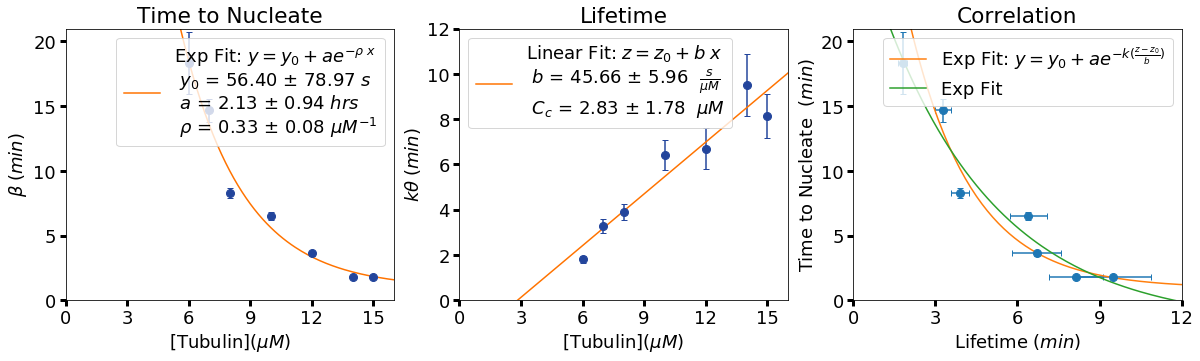

In [29]:
titles = ('Growth','Time to Nucleate','Lifetime','Correlation')
ylables = ('Growth Rate ' r'$(\mu m / min)$',r'$\beta \; (min)$',r'$k \theta \; (min)$','Time to Nucleate  ' r'$(min)$')

ylim = 21
scattersize = 8
#xtub = ()

plt.figure(figsize=(20,5))
#plt.suptitle('Fitted pooled data', fontsize=40) 

# plt.subplot(2,2,1)
# plt.errorbar(conc, fitdata['mu']['Value'].values, yerr=fitdata['mu']['SE'].values, fmt='o', markersize=scattersize)
# plt.plot(x_range, a1*x_range+a0)
# plt.ylim(0,1.5)
# plt.legend(('Linear Fit:  'r'$K_a$'' = %.2f 'r'$\pm$'' %.2f 'r'$\frac{dimers}{\mu M \; s}$''\n 'r'$C_c$'' = %.2f 'r'$\pm$'' %.2f  'r'$\mu M$' %(a1*27.1,SEG[1]*27.1, y_int,y_int_SE),'Mean & SE'),loc='upper left')

plt.subplot(1,3,1)
plt.errorbar(conc, fitdata['scale e']['Value'].values, yerr=fitdata['scale e']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color=blue)
plt.plot(x_range, exponential_nonorm(x_range, coeff[0],coeff[1],coeff[2]),color = orange)
plt.ylim(0,ylim)
plt.legend(['Exp Fit: 'r'$y = y_0+a e^{-\rho \; x}$' '\n 'r'$y_0$'' = %.2f 'r'$\pm$'' %.2f 'r'$s$''\n 'r'$a$'' = %.2f 'r'$\pm$'' %.2f 'r'$hrs$''\n 'r'$\rho$'' = %.2f 'r'$\pm$'' %.2f 'r'$\mu M ^{-1}$' %(coeff[0]*60,SE[0]*60,coeff[1]/60,SE[1]/60,coeff[2],SE[2])],loc='upper right')

plt.subplot(1,3,2)
plt.errorbar(conc, gamma_mu, yerr=gamma_muSE, fmt='o', markersize=scattersize,capsize = 3, color = blue)
plt.plot(x_range, A1*x_range+A0, color=orange)
plt.ylim(0,12)
plt.legend(['Linear Fit: 'r'$z = z_0 + b \; x$' '\n 'r'$b$'' = %.2f 'r'$\pm$'' %.2f  'r'$\frac{s}{\mu M}$''\n 'r'$C_c$'' = %.2f 'r'$\pm$'' %.2f  'r'$\mu M$' %(A1*60,SEL[1]*60, Y_int,Y_int_SE)],loc='upper left')

plt.subplot(1,3,3)
plt.errorbar( gamma_mu,fitdata['scale e']['Value'].values, xerr=gamma_muSE , yerr=fitdata['scale e']['SE'].values, fmt='o', markersize=scattersize,capsize = 3)
plt.plot(x_range, exponential_nonorm((x_range-A0)/A1, coeff[0],coeff[1],coeff[2]))
plt.plot(x_range, exponential_nonorm(x_range, coeffC[0],coeffC[1],coeffC[2]))
plt.ylim(0,21)
plt.legend(('Exp Fit: 'r'$y = y_0+a e^{-k(\frac{z-z_0}{b})}$','Exp Fit'),loc='upper right')


for i in [0,1,2] :
    plt.subplot(1,3,i+1)
    plt.xlabel(variable + r'$(\mu M)$')
    plt.xticks(np.arange(0, 16, 3))
    plt.ylabel(ylables[i+1])
    plt.title(titles[i+1]);
    plt.xlim(0,16)
    plt.tick_params(axis='both', width = 3, length = 6)
    #plt.grid(True)

plt.xlabel('Lifetime ' r'$(min)$') 
plt.xlim(0,12)
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png')) 
plt.savefig(path.parents[0]/('POSTERjoint_graphsFit_'+jointdate+'.pdf')) 

In [31]:
data = pd.read_csv(paths[0]/(date[0]+'_no_nuc.csv'),sep=',',index_col=False);
for i in np.arange(1,len(date)):
    df = pd.read_csv(paths[i]/(date[i]+'_no_nuc.csv'),sep=',',index_col=False);
    data = data.append(df)
data = data.sort_values(by=['[tub]'])
data.to_csv(path.parents[0]/('joint_no_nuc_'+jointdate+'.csv'), encoding='utf-8', index=True)
data

,[tub],No Nuc,Total Seeds,Percent No Nuc
0,6.0,17,70,24.285714
0,7.0,22,113,19.469027
1,7.0,1,112,0.892857
0,7.0,4,109,3.669725
0,8.0,17,132,12.878788
0,8.0,7,150,4.666667
1,10.0,3,141,2.127660
0,10.0,5,175,2.857143
1,10.0,4,184,2.173913
2,12.0,3,193,1.554404


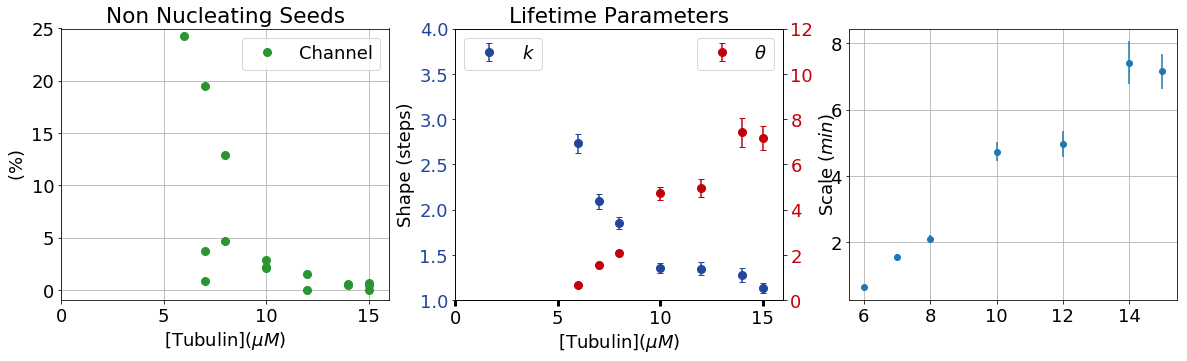

In [35]:
#plt.suptitle('Analysis of '+micscp+' joint data', fontsize=16)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))
#ax1.subplot(1,3,1)
ax1.errorbar(data['[tub]'],data['Percent No Nuc'], fmt='o', c= '#279631', markersize=scattersize)
ax1.set_xlabel(variable + r'$(\mu M)$')
ax1.set_ylabel( r'$(\%)$')
ax1.set_title('Non Nucleating Seeds');
ax1.set_xlim(0,16)
ax1.set_ylim(-1,25)
ax1.legend(['Channel'],loc='upper right')
ax1.grid(True)

#ax2.subplot(1,3,2)
#color = '#236A8E'
ax2.errorbar(fitdata[variable]['Value'],fitdata['shape']['Value'],yerr=fitdata['shape']['SE'], fmt='o',c=blue,markersize=8,capsize = 3)
ax2.set_xlabel(variable + r'$(\mu M)$')
ax2.set_ylabel('Shape (steps)')
ax2.set_title('Lifetime Parameters');
ax2.set_ylim(1,4)
ax2.set_xlim(0,16)
ax2.tick_params(axis='x', width = 3, length = 6)
ax2.tick_params(axis='both')
ax2.legend([r'$k$'],loc='upper left')
ax2.tick_params(axis='y', labelcolor= blue)
#ax2.grid(True)

ax4 = ax2.twinx() 
color = '#C2000B'
ax4.set_ylabel('Scale 'r'$(min)$')  # we already handled the x-label with ax1
ax4.errorbar(fitdata[variable]['Value'],fitdata['scale g']['Value'],yerr=fitdata['scale g']['SE'], fmt='o', c = color,markersize=8,capsize = 3)
ax4.set_ylim(0,12)
ax4.legend([r'$\theta$'],loc='upper right')
ax4.tick_params(axis='y', labelcolor= color)

#ax3.subplot(1,3,3)
ax3.errorbar(fitdata[variable]['Value'],fitdata['scale g']['Value'],yerr=fitdata['scale g']['SE'], fmt='o')

ax3.grid(True)

plt.savefig(path.parents[0]/('joint_graphsNoNucShape_'+jointdate+'.png'))
plt.savefig(path.parents[0]/('joint_graphsNoNucShape_'+jointdate+'.pdf'))